# Analisis Exploratorio
    COLUMNAS
    -'role'
    -'salary'
    -'industry'
    -'company size'
    -'people_in_data'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable as stb
from sklearn.preprocessing import OneHotEncoder
import re 
import warnings

In [3]:
df = pd.read_csv("/mnt/c/Users/USUARIO/Desktop/Adalab/project-da-promo-A-module-2-team-1-/Limpieza de documentos/preparadito.csv", index_col= 0)

verificamos que los index esten bien. 

In [4]:
df.head(3)

,survey_number,age,gender,country,education_level,programming_experience,programming_language,primary_bd_tool,years_ml,ml_frameworks,ml_algorithms,role,salary,industry,company_size,people_in_data,gender_2
0,910,50-54,Man,India,Bachelor’s degree,5-10 years,"Python, R","Local development environments (RStudio, Jupyt...",5-10 years,"Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",Other,"25,000-29,999",Manufacturing/Fabrication,50-249 employees,3-4,Man
1,784,50-54,Man,Indonesia,Master’s degree,20+ years,"SQL, C, C++, Java","Advanced statistical software (SPSS, SAS, etc.)",< 1 year,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",Program/Project Manager,"60,000-69,999",Manufacturing/Fabrication,"1000-9,999 employees",1-2,Man
2,924,22-24,Man,Pakistan,Master’s degree,1-3 years,"Python, C++, Java","Basic statistical software (Microsoft Excel, G...",I do not use machine learning methods,NaN,NaN,Software Engineer,$0-999,Academics/Education,"1000-9,999 employees",0,Man


In [5]:
df.tail(3)

,survey_number,age,gender,country,education_level,programming_experience,programming_language,primary_bd_tool,years_ml,ml_frameworks,ml_algorithms,role,salary,industry,company_size,people_in_data,gender_2
25970,494,50-54,Man,Sweden,Doctoral degree,I have never written code,NaN,"Basic statistical software (Microsoft Excel, G...",NaN,NaN,NaN,Research Scientist,$0-999,Academics/Education,"1000-9,999 employees",20+,Man
25971,277,45-49,Man,United States of America,Master’s degree,5-10 years,"Python, SQL",NaN,4-5 years,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",Data Scientist,NaN,Online Service/Internet-based Services,"10,000 or more employees",20+,Man
25972,255,18-21,Man,India,Bachelor’s degree,I have never written code,NaN,"Advanced statistical software (SPSS, SAS, etc.)",NaN,NaN,NaN,Business Analyst,$0-999,Other,0-49 employees,0,Man


In [6]:
df.shape

(25973, 17)

Analizamos que tipo de datos tenemos

In [7]:
df.dtypes

survey_number              int64
age                       object
gender                    object
country                   object
education_level           object
programming_experience    object
programming_language      object
primary_bd_tool           object
years_ml                  object
ml_frameworks             object
ml_algorithms             object
role                      object
salary                    object
industry                  object
company_size              object
people_in_data            object
gender_2                  object
dtype: object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survey_number,25973.0,11054.664921,101471.622125,120.0,443.0,656.0,1038.0,2488653.0


In [9]:
df.describe(include = ['O']).T

,count,unique,top,freq
age,25973,11,25-29,4931
gender,25973,5,Man,20598
country,25973,66,India,7434
education_level,25973,7,Master’s degree,10132
programming_experience,25973,7,1-3 years,7874
programming_language,24941,825,Python,4740
primary_bd_tool,18489,6,"Basic statistical software (Microsoft Excel, G...",7246
years_ml,23754,9,< 1 year,9163
ml_frameworks,19624,1401,Scikit-learn,2688
ml_algorithms,19315,756,"Linear or Logistic Regression, Decision Trees ...",1807


Revisamos los nulos que tenemos

In [10]:
df.isnull().sum()

survey_number                 0
age                           0
gender                        0
country                       0
education_level               0
programming_experience        0
programming_language       1032
primary_bd_tool            7484
years_ml                   2219
ml_frameworks              6349
ml_algorithms              6658
role                          0
salary                    10582
industry                   9648
company_size               9722
people_in_data             9847
gender_2                      0
dtype: int64

Revisar duplicados

In [11]:
df.duplicated().sum()

1

Encontramos el duplicado

In [12]:
df.loc[df.duplicated(), :]

,survey_number,age,gender,country,education_level,programming_experience,programming_language,primary_bd_tool,years_ml,ml_frameworks,ml_algorithms,role,salary,industry,company_size,people_in_data,gender_2
24480,297,18-21,Man,India,Bachelor’s degree,< 1 years,"Python, C, C++",NaN,I do not use machine learning methods,NaN,NaN,Student,NaN,NaN,NaN,NaN,Man


In [13]:
df.loc[[24480]]


,survey_number,age,gender,country,education_level,programming_experience,programming_language,primary_bd_tool,years_ml,ml_frameworks,ml_algorithms,role,salary,industry,company_size,people_in_data,gender_2
24480,297,18-21,Man,India,Bachelor’s degree,< 1 years,"Python, C, C++",NaN,I do not use machine learning methods,NaN,NaN,Student,NaN,NaN,NaN,NaN,Man


eliminamos el duplicado

In [14]:
df.drop_duplicates(inplace= True)

In [15]:
df.duplicated().sum()

0

Revisar valores únicos

In [16]:
df.role.unique()

array(['Other', 'Program/Project Manager', 'Software Engineer',
       'Research Scientist', 'Currently not employed', 'Student',
       'Data Scientist', 'Data Analyst', 'Machine Learning Engineer',
       'Business Analyst', 'Data Engineer', 'Product Manager',
       'Statistician', 'Developer Relations/Advocacy',
       'DBA/Database Engineer'], dtype=object)

In [17]:
plt.rcParams["figure.figsize"] = (10,8)
warnings.filterwarnings('ignore')

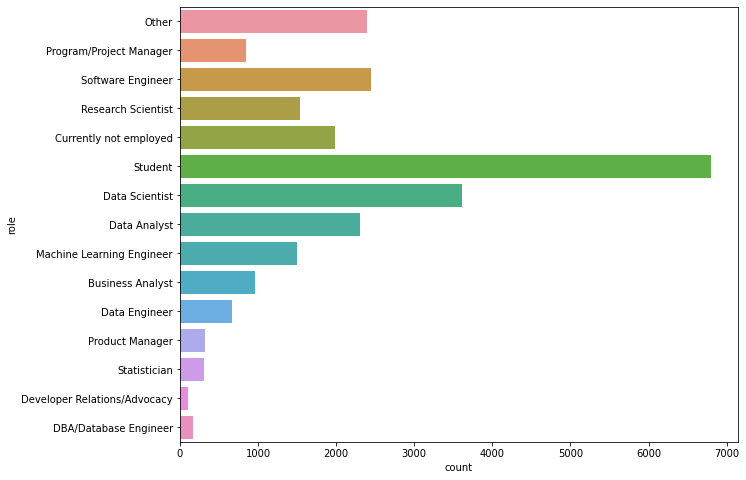

In [18]:
ax = sns.countplot(y="role", data=df)

    Role no tiene nulos ni errores en valores únicos. No necesitamos hacer cambios

In [19]:
df.salary.unique()

array(['25,000-29,999', '60,000-69,999', '$0-999', '30,000-39,999', nan,
       '15,000-19,999', '70,000-79,999', '2,000-2,999', '10,000-14,999',
       '5,000-7,499', '20,000-24,999', '1,000-1,999', '100,000-124,999',
       '7,500-9,999', '4,000-4,999', '40,000-49,999', '50,000-59,999',
       '3,000-3,999', '300,000-499,999', '200,000-249,999',
       '125,000-149,999', '250,000-299,999', '80,000-89,999',
       '90,000-99,999', '150,000-199,999', '>$1,000,000',
       '$500,000-999,999'], dtype=object)

In [20]:
df.salary.value_counts()

$0-999              3369
1,000-1,999          969
10,000-14,999        950
30,000-39,999        741
100,000-124,999      725
5,000-7,499          699
50,000-59,999        697
40,000-49,999        688
20,000-24,999        587
2,000-2,999          575
15,000-19,999        573
7,500-9,999          552
60,000-69,999        551
25,000-29,999        470
70,000-79,999        464
4,000-4,999          456
150,000-199,999      392
80,000-89,999        391
3,000-3,999          380
125,000-149,999      379
90,000-99,999        350
200,000-249,999      177
300,000-499,999       91
250,000-299,999       75
>$1,000,000           58
$500,000-999,999      32
Name: salary, dtype: int64

La columna salario tiene el simbolo $ en algunos valores, decidimos quitar este signo

In [21]:
df["salary_clean"] = df["salary"].str.replace("$","")

In [22]:
df.salary_clean.value_counts()

0-999              3369
1,000-1,999         969
10,000-14,999       950
30,000-39,999       741
100,000-124,999     725
5,000-7,499         699
50,000-59,999       697
40,000-49,999       688
20,000-24,999       587
2,000-2,999         575
15,000-19,999       573
7,500-9,999         552
60,000-69,999       551
25,000-29,999       470
70,000-79,999       464
4,000-4,999         456
150,000-199,999     392
80,000-89,999       391
3,000-3,999         380
125,000-149,999     379
90,000-99,999       350
200,000-249,999     177
300,000-499,999      91
250,000-299,999      75
>1,000,000           58
500,000-999,999      32
Name: salary_clean, dtype: int64

In [23]:
df.salary.isnull().sum()

10581

para que salga la gráfica en el orden que quiero, he puesto una variable con el nombre de las columnas ordenadas.

In [49]:
salary_order= "Unspecified",'0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999','4,000-4,999','5,000-7,499', '7,500-9,999','10,000-14,999','15,000-19,999','20,000-24,999', "25,000-29,999",'30,000-39,999','40,000-49,999', '50,000-59,999','60,000-69,999', '70,000-79,999','80,000-89,999','90,000-99,999', '100,000-124,999','125,000-149,999','150,000-199,999','200,000-249,999','250,000-299,999','300,000-499,999','500,000-999,999', '>1,000,000'

Reemplazamos los nulos por "Unspecified"

In [50]:
df['salary_clean'] = df['salary_clean'].replace(np.nan, "Unspecified")

In [47]:
df.salary_clean.unique()

array(['25,000-29,999', '60,000-69,999', '0-999', '30,000-39,999',
       'Unspecified', '15,000-19,999', '70,000-79,999', '2,000-2,999',
       '10,000-14,999', '5,000-7,499', '20,000-24,999', '1,000-1,999',
       '100,000-124,999', '7,500-9,999', '4,000-4,999', '40,000-49,999',
       '50,000-59,999', '3,000-3,999', '300,000-499,999',
       '200,000-249,999', '125,000-149,999', '250,000-299,999',
       '80,000-89,999', '90,000-99,999', '150,000-199,999', '>1,000,000',
       '500,000-999,999'], dtype=object)

    # Aca dejamos la gráfica con los nan convertidos en Unspecified

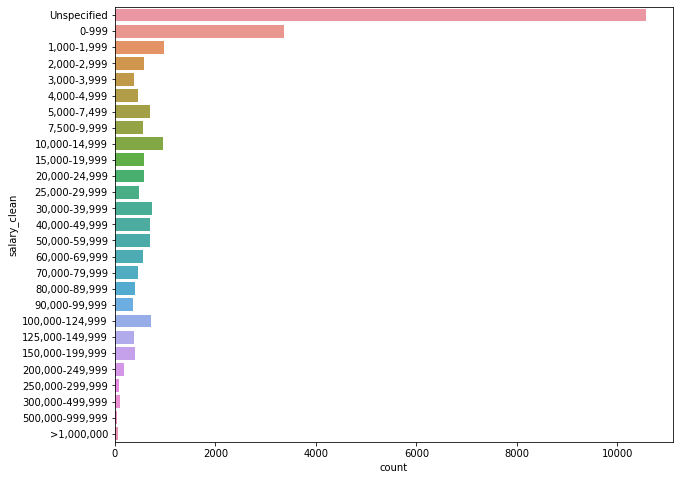

In [51]:
ax = sns.countplot(y="salary_clean", data=df, order= salary_order)

In [57]:
salary_order= '0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999','4,000-4,999','5,000-7,499', '7,500-9,999','10,000-14,999','15,000-19,999','20,000-24,999', "25,000-29,999",'30,000-39,999','40,000-49,999', '50,000-59,999','60,000-69,999', '70,000-79,999','80,000-89,999','90,000-99,999', '100,000-124,999','125,000-149,999','150,000-199,999','200,000-249,999','250,000-299,999','300,000-499,999','500,000-999,999', '>1,000,000'

    # Aca dejamos la gráfica sin los nan convertidos en Unspecified

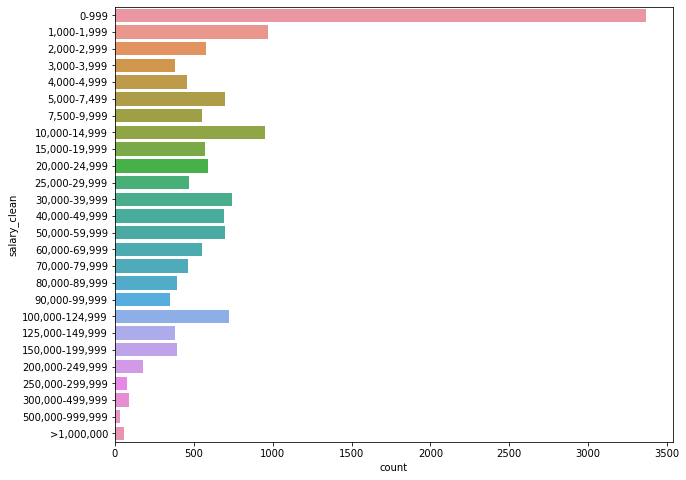

In [58]:
ax = sns.countplot(y="salary_clean", data=df, order= salary_order)

    # Aca dejamos la gráfica con los nan convertidos en Unspecified e incluimos género

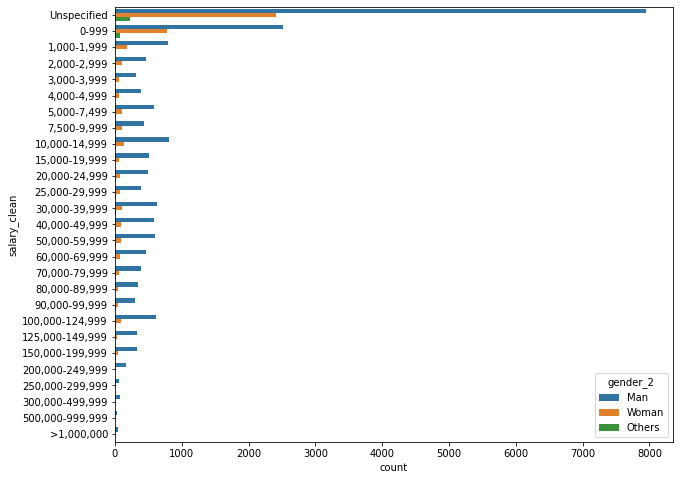

In [52]:
ax = sns.countplot(y="salary_clean", data=df, hue= "gender_2", order= salary_order)

In [61]:
df.gender_2.unique()

array(['Man', 'Woman', 'Others'], dtype=object)

salarios por género

In [ ]:
ax = sns.countplot(x="gender_2", hue= "salary_clean", data=df)

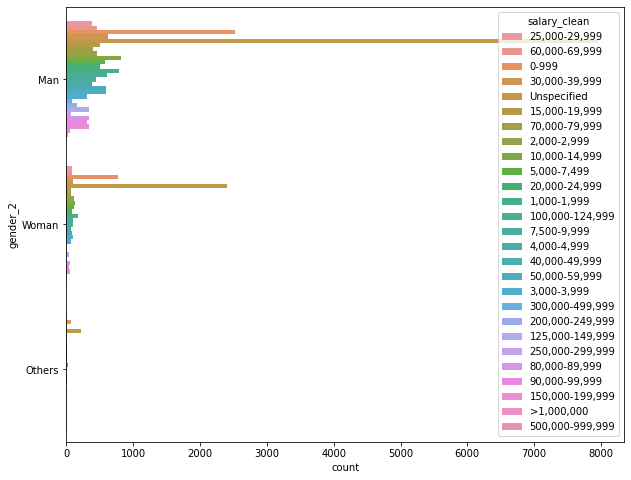

In [85]:
ax = sns.countplot(y="gender_2", hue= "salary_clean", data=df)

    SALARIO
    Algunos datos tenian el simbolo $. Hemos creado una nueva columna, donde eliminamos el $ de los valores. Los valores nulos los convertimos en sin especificar

In [28]:
df.industry.value_counts()

Computers/Technology                      4079
Academics/Education                       3214
Accounting/Finance                        1459
Other                                     1136
Manufacturing/Fabrication                  872
Medical/Pharmaceutical                     776
Government/Public Service                  726
Online Service/Internet-based Services     585
Energy/Mining                              558
Retail/Sales                               536
Insurance/Risk Assessment                  424
Marketing/CRM                              373
Broadcasting/Communications                326
Shipping/Transportation                    316
Non-profit/Service                         300
Online Business/Internet-based Sales       275
Military/Security/Defense                  197
Hospitality/Entertainment/Sports           173
Name: industry, dtype: int64

In [29]:
df.industry.isnull().sum()

9647

In [30]:
large_to_small= df.groupby('industry').size().sort_values().index[::-1]

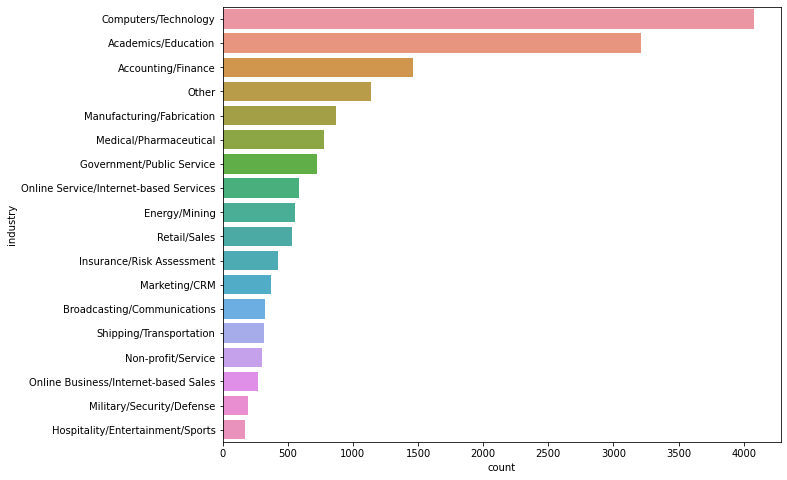

In [31]:
ax = sns.countplot(y="industry", data=df, order= large_to_small)

In [67]:
df['industry_clean'] = df['industry'].replace(np.nan, "Unspecified")

In [70]:
large_to_small= df.groupby('industry_clean').size().sort_values().index[::-1]

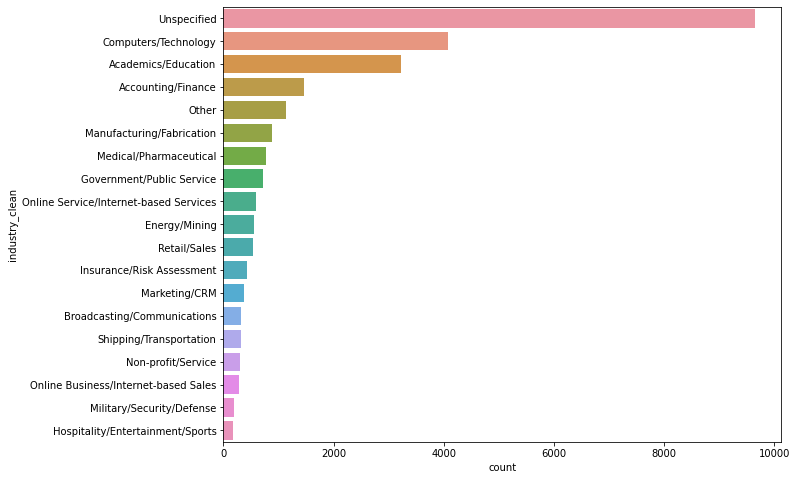

In [71]:
ax = sns.countplot(y="industry_clean", data=df, order= large_to_small)

    La columna industry tiene valores nulos, que reemplazamos por Unspecified

In [32]:
df["company_size"].unique()

array(['50-249 employees', '1000-9,999 employees', nan,
       '10,000 or more employees', '0-49 employees', '250-999 employees'],
      dtype=object)

In [33]:
df.company_size.isnull().sum()

9721

Acá he puesto la variable large to small con el codigo para ordenar según la cantidad

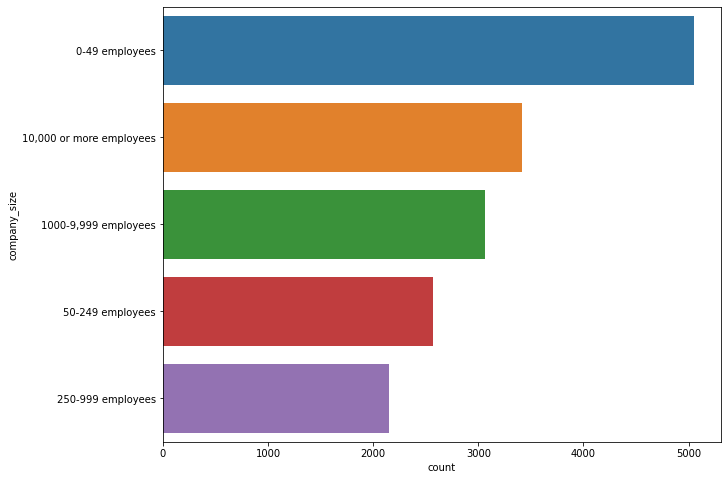

In [34]:
large_to_small= df.groupby('company_size').size().sort_values().index[::-1]
ax = sns.countplot(y="company_size", data=df, order= large_to_small)

In [72]:
df['company_size_clean'] = df['company_size'].replace(np.nan, "Unspecified")

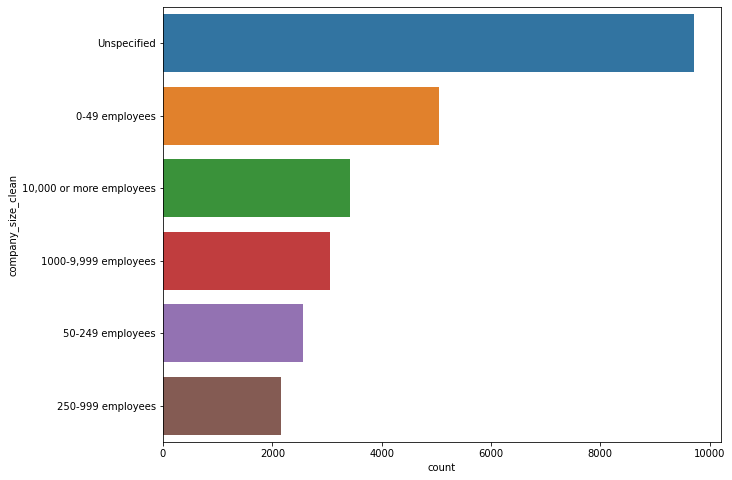

In [73]:
large_to_small= df.groupby('company_size_clean').size().sort_values().index[::-1]
ax = sns.countplot(y="company_size_clean", data=df, order= large_to_small)

    Los valores nulos de la columna company size los dejamos con Unspecified

In [35]:
df.people_in_data.unique()

array(['3-4', '1-2', '0', '5-9', nan, '10-14', '20+', '15-19'],
      dtype=object)

In [36]:
df.people_in_data.value_counts()

1-2      3642
20+      3595
0        3064
3-4      2558
5-9      1850
10-14     996
15-19     421
Name: people_in_data, dtype: int64

In [37]:
df.people_in_data.isnull().sum()

9846

In [38]:
df.people_in_data.unique()

array(['3-4', '1-2', '0', '5-9', nan, '10-14', '20+', '15-19'],
      dtype=object)

In [39]:
pd_order= '0', '1-2', '3-4', '5-9', '10-14','15-19', '20+' 

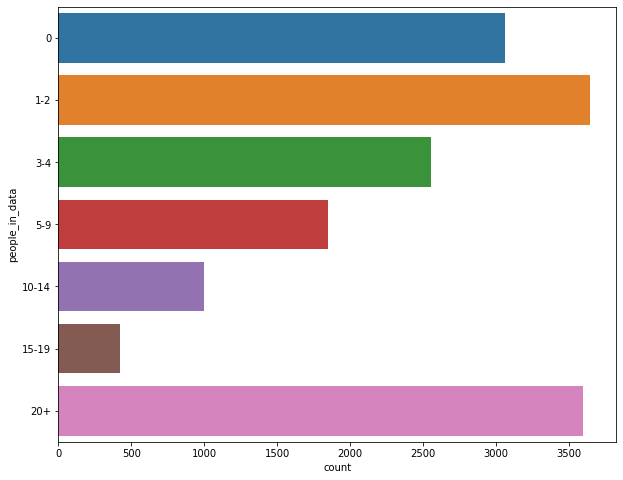

In [40]:
ax = sns.countplot(y="people_in_data", data=df, order= pd_order)

In [74]:
df['people_in_data_clean'] = df['people_in_data'].replace(np.nan, "Unspecified")

In [75]:
pd_order= "Unspecified",'0', '1-2', '3-4', '5-9', '10-14','15-19', '20+' 

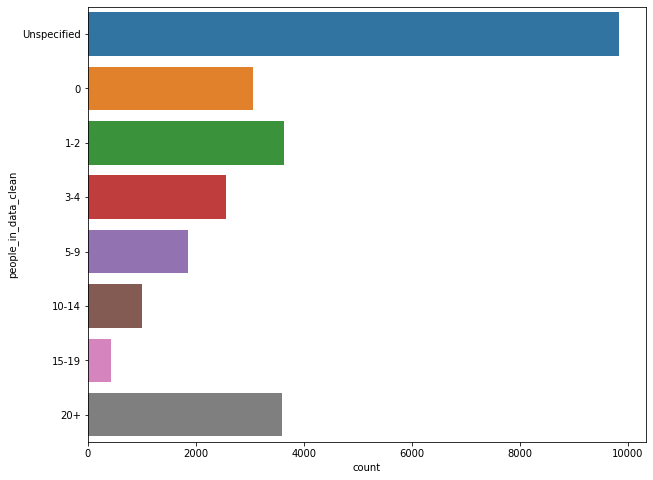

In [77]:
ax = sns.countplot(y="people_in_data_clean", data=df, order= pd_order)

    Reemplazamos los valores nulos de la columna People in data por Unspecified, suena un poco raro 0 personas in data, podriamos cambiar el nombre de 0 por sin equipo. 

In [78]:
df.to_csv("analisis_exploratorio_col_empresas.csv")

# CREAMOS UN DATA FRAME SOLO DE MUJERES Y OTRO SOLO DE HOMBRES PARA HACER COMPARACIONES

In [86]:
df_mujeres= df[df["gender_2"].isin(["Woman"])]

In [87]:
df_hombres= df[df["gender_2"].isin(["Man"])]

# Comparación en Role

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


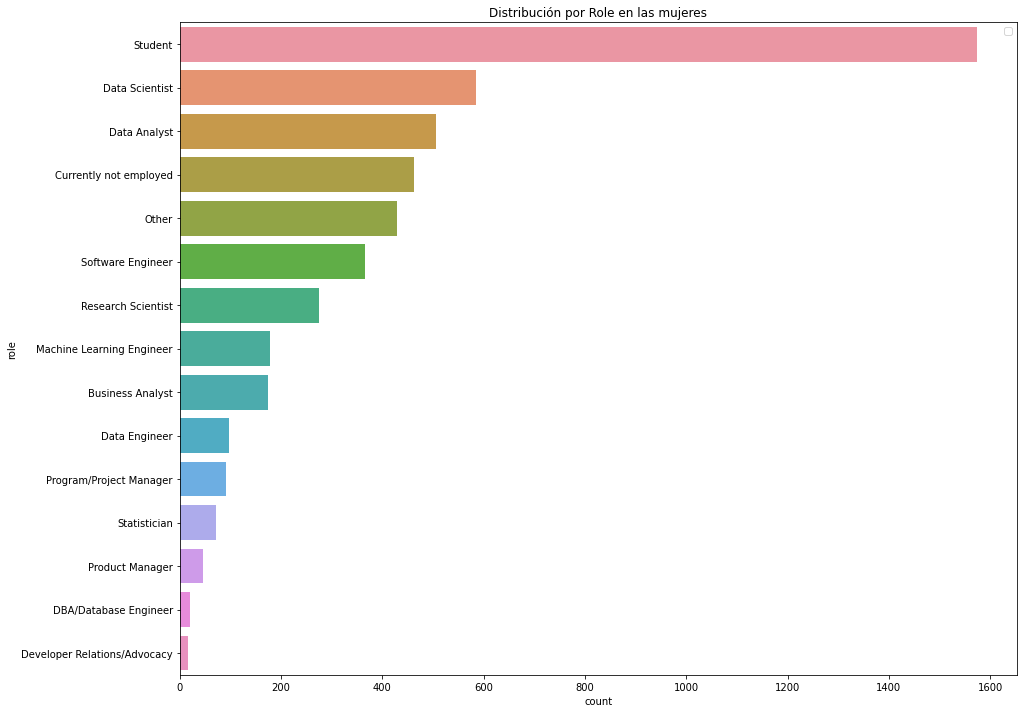

In [95]:
large_to_small= df_mujeres.groupby('role').size().sort_values().index[::-1]
plt.figure(figsize =(15,12)) 
fig = sns.countplot(y= "role", order= large_to_small, data = df_mujeres) 
fig.legend(loc="upper right")
fig.set_title('Distribución por Role en las mujeres')
plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


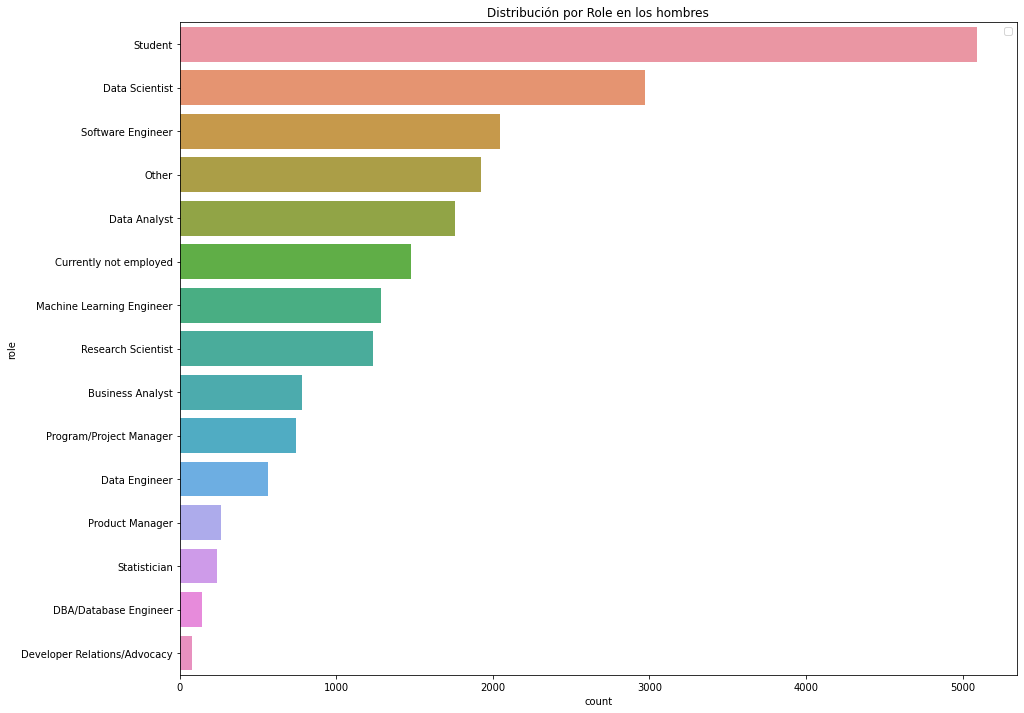

In [96]:
large_to_small= df_hombres.groupby('role').size().sort_values().index[::-1]
plt.figure(figsize =(15,12)) 
fig = sns.countplot(y= "role", order= large_to_small, data = df_hombres) 
fig.legend(loc="upper right")
fig.set_title('Distribución por Role en los hombres')
plt.show() 

# Comparacion en Salario

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


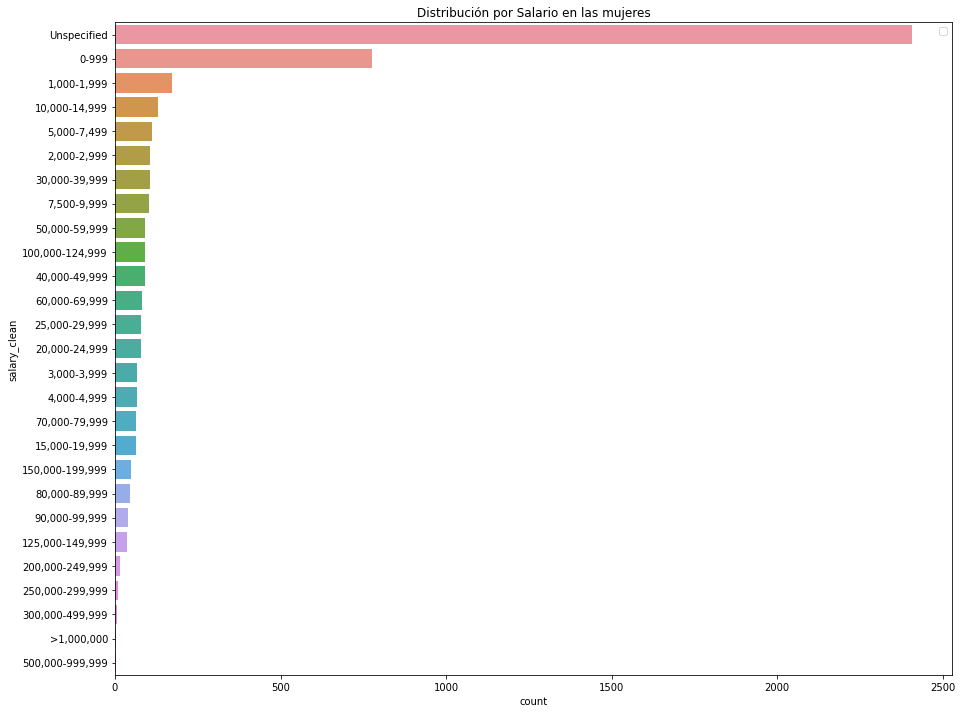

In [97]:
large_to_small= df_mujeres.groupby('salary_clean').size().sort_values().index[::-1]
plt.figure(figsize =(15,12)) 
fig = sns.countplot(y= "salary_clean", order= large_to_small, data = df_mujeres) 
fig.legend(loc="upper right")
fig.set_title('Distribución por Salario en las mujeres')
plt.show() 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


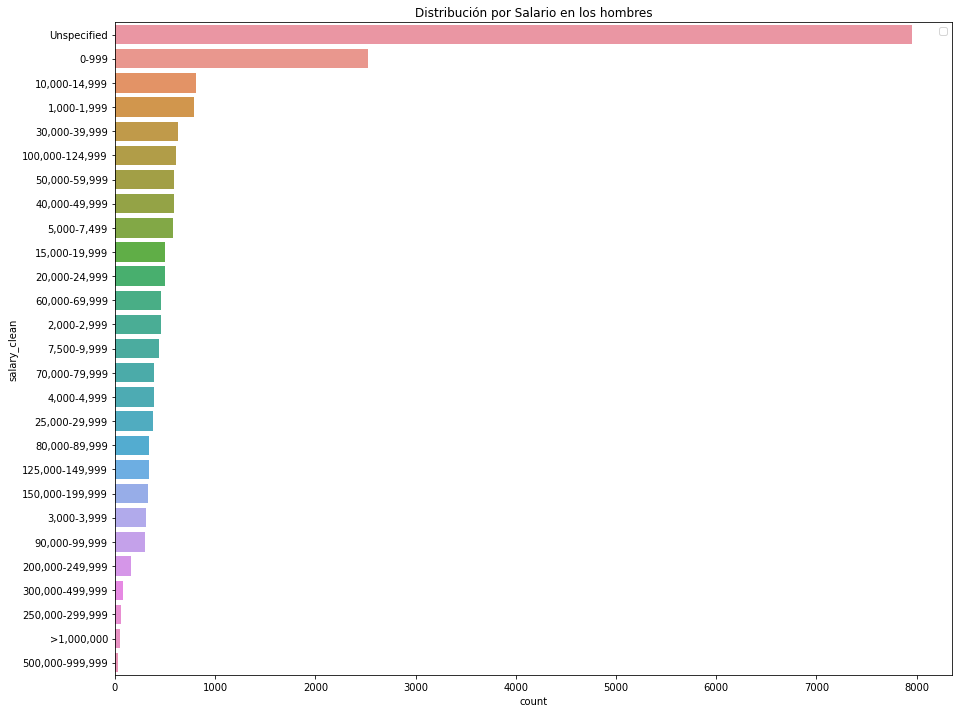

In [98]:
large_to_small= df_hombres.groupby('salary_clean').size().sort_values().index[::-1]
plt.figure(figsize =(15,12)) 
fig = sns.countplot(y= "salary_clean", order= large_to_small, data = df_hombres) 
fig.legend(loc="upper right")
fig.set_title('Distribución por Salario en los hombres')
plt.show() 